# imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#custom imports
import coencodeVarious as CV
import ClassMSSFR      as MSSFR

# From density function to fraction, using gamma Functions

## Integrating a single schechter function

This method is also done in Norman Langer 2005
https://arxiv.org/pdf/astro-ph/0512271.pdf

For a single schechter function we know the number density of galaxy stellar masses (within some observational range often logM  between 7-12) is given by.

$$\phi (M) dM =  \phi \left(\frac{M}{M_c}\right)^{\alpha}* e^{-M/M_c} $$

We want to know what the amount of star formation rate (SFR) in units Msun is in a given bin of metallicities.
Using the mass-metallicity relation we can translate this problem to the amount
of SFR per Msun in a given galaxy stellar mass bin. An important assumption here
is that we assume that the SFR spreads evenly amongst every Msun independent of 
the galaxy type. Furthermore this means that we do not want to know the number density 
of galaxies within a range of galaxy stellar masses, but instead the amount of mass.
Hence we want to integrate,

$$M \phi (M) dM =  M \phi \left(\frac{M}{M_c}\right)^{\alpha}* e^{-M/M_c}.  $$

If we then divide the amount of mass in a galaxy stellar mass interval by the
total amount of galaxy stellar mass in all galaxies we get a fraction between 0-1.
Because we assumed the the SFR spreads evenly amongst all galaxy stellar masses, 
this fraction relates to the fraction of SFR in a galaxy stellar mass bin,
which in turn relates to a metallicity bin.

To integrate this function we use the following type of integral
I havent done the math for to prove this integral but 
https://en.wikipedia.org/wiki/Incomplete_gamma_function

$$ \hat{\Gamma}(s, x) = \int_0^x t^{s-1} e^{-t} dt,$$

where $\hat{\Gamma}$ denotes the *incomplete* gamma function.

Hence I want to rewrite $M\phi (M) dM $ in a similar shape

$$\int_0^x M \phi (M) dM =\int_0^x  M \phi \left(\frac{M}{M_c}\right)^{\alpha}* e^{-M/M_c} dM $$

Note that the term in brackets and exponent is $\frac{M}{M_c}$
whereas we integrate over dM. 

to convert dM to $d\frac{dM}{dM_c}$ consider the substitution

$$ t = \frac{M}{M_c} --> \frac{dt}{dM} = \frac{1}{M_c}\ \ --> \ \ dM = M_c dt$$

substitute dM and $\frac{M}{M_c}$, and the integration limit shifts
from x-> $\frac{x}{M_c}$

$$\int_0^x  M \phi (M) dM =\int_0^\frac{x}{M_c}   M \phi \left(t\right)^{\alpha}* e^{-t} M_c dt$$

$M_c$ and $\phi$ are constants so we can move them out of the integral

$$\int_0^x  M \phi (M) dM =M_c \phi  \int_0^\frac{x}{M_c}   M \left(t\right)^{\alpha}* e^{-t} dt$$

To get rid of the M we multiply by $\frac{M_c}{M_c}$ and substitute for t

$$\int_0^x  M \phi (M) dM =M_c^2 \phi  \int_0^\frac{x}{M_c}   \left(t\right)^{\alpha+1}* e^{-t} dt$$

Note in the original $\hat{\Gamma}(s, x)$ we have a power s-1

so in our case,

$$\int_0^x  M \phi (M) dM =M_c^2 \phi * \hat{\Gamma}(\alpha+2, \frac{x}{M_c})$$

the fraction f is then 

$$f = \frac{\int_0^x  M \phi (M) dM}{\int_0^{\infty}  M \phi (M) dM} =
      \frac{M_c^2 \phi * \hat{\Gamma}(\alpha+2, \frac{x}{M_c})}{M_c^2 \phi * \Gamma(\alpha+2)} = 
      \frac{\hat{\Gamma}(\alpha+2, \frac{x}{M_c})}{\Gamma(\alpha+2)},$$
      
where $\Gamma$ is the *complete* gamma function, this explains for example
equation 2 in Norman Langer 2005.

The above gives us the integral from 0-x, instead we want integral between x1-x2:

$$\int_{x_1}^{x_2} = \int_0^{x_2} - \int_0^{x_1} = 
                    \frac{\hat{\Gamma}(\alpha+2, \frac{x_2}{M_c})}{\Gamma(\alpha+2)} -
                    \frac{\hat{\Gamma}(\alpha+2, \frac{x_1}{M_c})}{\Gamma(\alpha+2)}$$


In the scipy library the incomplete gamma function (scipy.special.gammainc) is already normalized by the complete gamma function

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html

Hence we get

$$f = scipy.special.gammainc(\alpha+2, \frac{x_2}{M_c}) - scipy.special.gammainc(\alpha+2, \frac{x_1}{M_c}) $$

# Integrating double schechter function

Once we know how to integrate a single schechter function, integrating the double
schechter function to calculate the fraction is reasonably straight-forward

The double schechter function of Furlong et al looks like


$$ \phi(M) dM = \left[ \phi_1 \left(t\right)^{\alpha_1} + 
                       \phi_2 \left(t\right)^{\alpha_2} \right] * e^{-\frac{M}{M_c}} $$
                       
which becomes by the same steps as for the single schechter function becomes,

$$\int_0^x  M \phi (M) dM =M_c^2 \phi_1  \int_0^\frac{x}{M_c}   \left(t\right)^{\alpha_1+1}* e^{-t} +
                           M_c^2 \phi_2  \int_0^\frac{x}{M_c}   \left(t\right)^{\alpha_2+1}* e^{-t}dt$$
                           
Substitute in the gamma function
                           
$$\int_0^x  M \phi (M) dM =M_c^2 \phi_1 * \hat{\Gamma}(\alpha_1+2, \frac{x}{M_c})+
                           M_c^2 \phi_2 * \hat{\Gamma}(\alpha_2+2, \frac{x}{M_c}) $$
                           
The normalization is the sum of both complete gamma functions.

$$ f = \frac{M_c^2 \phi_1 * \hat{\Gamma}(\alpha_1+2, \frac{x}{M_c})+
             M_c^2 \phi_2 * \hat{\Gamma}(\alpha_2+2, \frac{x}{M_c})}
            {M_c^2 \phi_1 * \Gamma(\alpha_1+2)+   M_c^2 \phi_2 * \Gamma(\alpha_2+2)} =
            \frac{\phi_1 * \hat{\Gamma}(\alpha_1+2, \frac{x}{M_c})+
             \phi_2 * \hat{\Gamma}(\alpha_2+2, \frac{x}{M_c})}
            { \phi_1 * \Gamma(\alpha_1+2)+   \phi_2 * \Gamma(\alpha_2+2)}$$
            
This time the normalization does by scipy does matter. Furthermore, we need to adjust for the fact
that scipy already divides each incomplete by the total gamma function.

rewriting the equation (else is becomes a big mess)

$$ f = \frac{ a + b}{c+d} $$

where a and b are the *scipy incomplete functions* and  c and d are the *scipy complete functions*

we solve the scipy problem by doing

$$  f = \frac{ a*c + b*d}{c+d} $$

to cancel the normalization in each scipy.inc function

# From mass density to metallicity density

To calculate the fraction of SFR with Z between Z1-Z2
we need to know M1 and M2 so we can use the equation above.
These values depend on the metallicity- galaxy stellar mass relations (ZM relations)
which are discussed in GalaxyStellarMassMetallicityRelation.ipynb.

Once we know M1 and M2, we use the scipy bundle of gamma functions
to get the fraction in a bin.


# Testing and plottting

In [6]:
#My metallicity grid in the simulation
metallicityGrid = np.logspace(-4,-1.5,1000)
mssfr           = MSSFR.MSSFR(metallicityGrid=metallicityGrid)
bins            = mssfr.metallicityBinEdges

warning no normalisation of mass evolved assuming 1


1.0
1.0
1.0
1.0
1.0
1.0


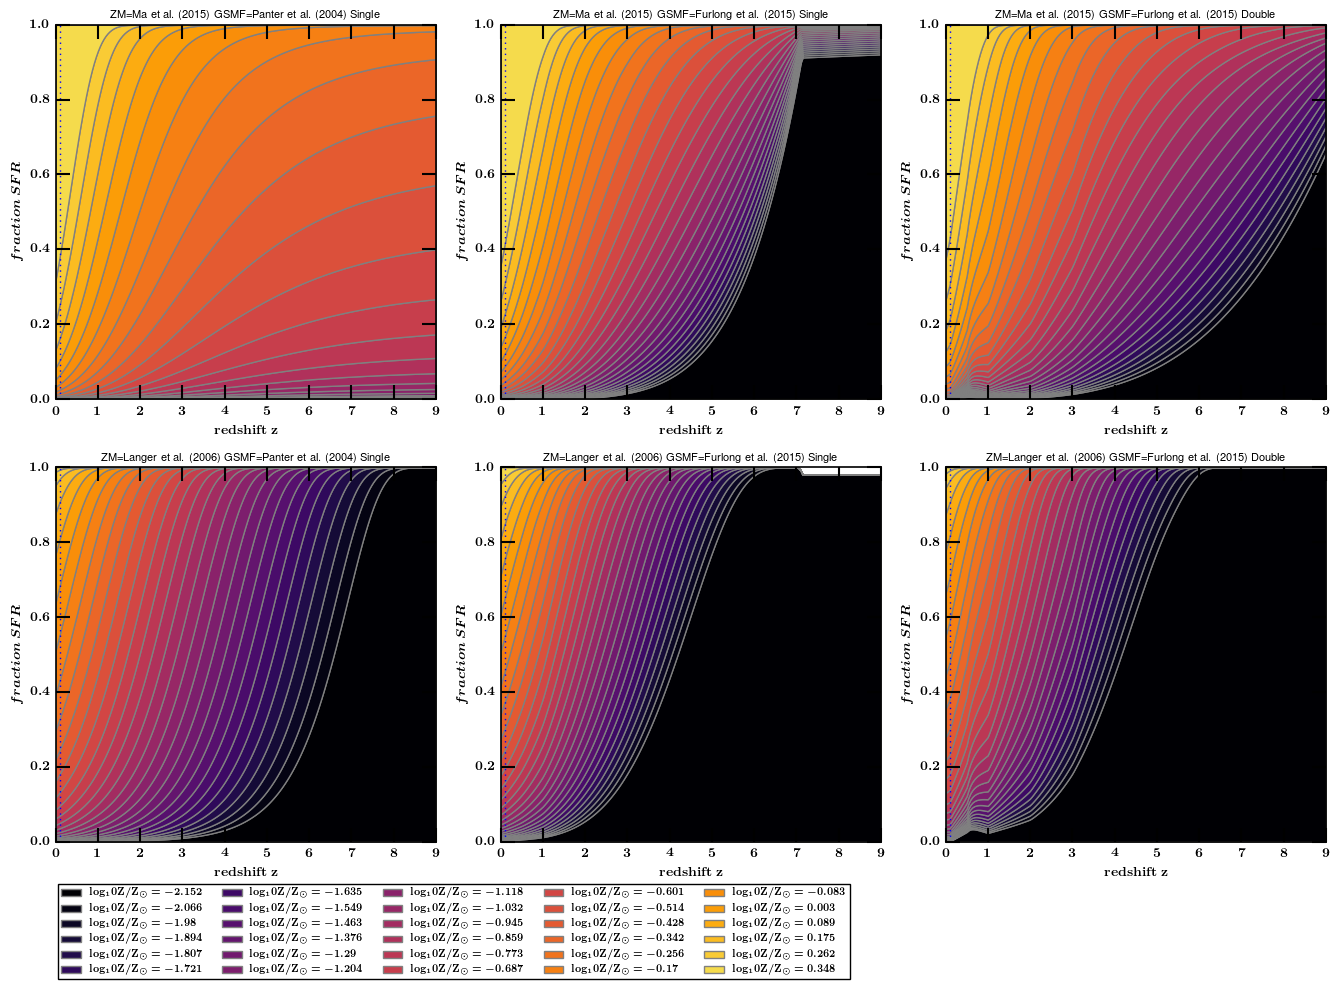

In [3]:
cm       = plt.get_cmap('inferno')
nColors  = len(metallicityGrid)+3
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

redshifts = np.linspace(0.0, 9,200)

fig, axes = plt.subplots(2,3, figsize=(13.5,9))
ZMs       = ['Ma et al. (2015)','Langer et al. (2006)']
GSMFs     = ['Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Furlong et al. (2015) Double']
for nrZM, ZM in enumerate(ZMs):
    for nrGSMF, GSMF in enumerate(GSMFs):
        a = axes[nrZM][nrGSMF]
        fractionsLow = np.zeros(len(redshifts))
        for nrBin, _ in enumerate(bins[:-1]):
            Zlower   = bins[nrBin]
            Zupper   = bins[nrBin+1]
            label    = r'$\rm log_10{Z/Z_{\odot}}=%s$'\
                    %(np.round(np.log10(metallicityGrid[nrBin]/mssfr.solarMetallicity), 3))
            mssfr.GSMFprescription = GSMF
            mssfr.ZMprescription   = ZM
            title       = 'ZM='+ZM +'   GSMF='+GSMF
            fractions   = mssfr.returnFractionMZ_GSMF(Zlower, Zupper, redshifts)
            fractionsUp = fractionsLow + fractions
            a.fill_between(redshifts, fractionsLow, fractionsUp,
                              facecolor=mycolors[nrBin], lw=1., label=label, edgecolor='grey')
            a.set_title(title, fontsize=8)
            fractionsLow= fractionsUp
        nameX = r'$\rm redshift\ z$'
        nameY = r'$fraction\ SFR$'
        a = CV.layoutAxes(a, nameX, nameY, fontsize=10)
        a.set_xlim(np.min(redshifts), np.max(redshifts))
        a.axvline(0.1, linestyle=':')
        if (nrZM == 1) & (nrGSMF == 0):
            a.legend(prop={'size':7}, loc=1, bbox_to_anchor=(1.6, -0.6, 0.5, 0.5), ncol=5)
        a.set_ylim(0,1)
        print np.max(fractionsLow)
plt.tight_layout()
plt.show()
plt.close()

Note that the moment the total integral drops below 1 it is due to the lower limit in the metallicity integral
Currently it is already set to 1E-90 meaning that there is some fraction of SFR going into smaller metallicities.
However if we set the lower limit to zero we get divide by zero errors in the integral.

# MSSFR as PDF

0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69


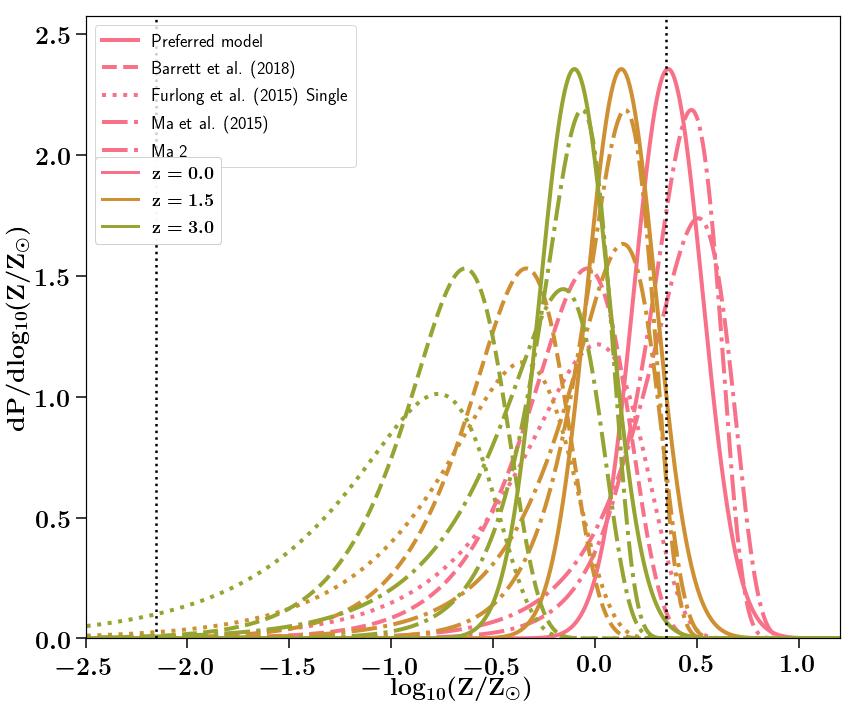

In [15]:



method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'                      , 'MZ_GSMF'                    , 'MZ_GSMF'  ]
SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Madau et al. (2014)'          , 'Madau et al. (2014)'        , 'Madau et al. (2014)']
logNormal  = ['Neijssel Phenomenological', None                         , None                          , None                         , None]
GSMFs      = [None                       , 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single']
MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. (2006)'        , 'Ma et al. (2015)'           , 'Ma et al. (2015)']

linestyles = ['-'                        , '--'                         , ':'                           , '-.'                         , '-.']
labels     = ['Preferred model'          , 'Barrett et al. (2018)'      , 'Furlong et al. (2015) Single', 'Ma et al. (2015)'           , 'Ma 2']


cm       = plt.get_cmap('viridis')
nColors  = 8+1  #want three colours for three variations (1 used in other plot later)
                    # dont want the brigthest colour hence I add a dummy value.
                    #Should be consistent with figure of metallicity PDFs
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

colours  =  [ 'b'                        ,mycolors[0]                   , mycolors[1]       \
             , mycolors[2], mycolors[3]]


import seaborn as sns
redshifts = [0, 1, 2, 3, 4, 5, 6, 7]
zcolors       = sns.color_palette("husl", len(redshifts))
redshifts         = [0, 1, 2]
alphas = [1.0, 0.6, 0.3]

fig, axes = plt.subplots(1,1, figsize=(12,10))
zBins = np.logspace(-4.5,0.,1000)
center = (zBins[1:] + zBins[:-1])/2.
width  = np.diff(np.log10(zBins))

handles1 = []
for nrz, redshift in enumerate(redshifts):
    for nrL, L in enumerate(labels[0:]):
        PDF = np.zeros(len(center))
        mssfr.Zprescription         = method[nrL]
        mssfr.SFRprescription       = SFRs[nrL]
        mssfr.logNormalPrescription = logNormal[nrL]
        mssfr.GSMFprescription      = GSMFs[nrL]
        mssfr.ZMprescription        = MZs[nrL]
        #code is done such that we have to do it per metallicity
        for nrZ, Z in enumerate(center):
            Zlower   = zBins[nrZ]
            Zupper   = zBins[nrZ+1]
            if method[nrL] == 'logNormal':
                PDF[nrZ] = mssfr.returnFractionLogNormal(Zlower, Zupper, redshift)
            if method[nrL] == 'MZ_GSMF':
                PDF[nrZ] = mssfr.returnFractionMZ_GSMF(Zlower, Zupper, [redshift])
        PDF = np.divide(PDF, width)
        if nrz==0:
            label = labels[nrL] #+'  '+'  z='+str(redshift[0])
            ll    = True
        else:
            label = None
            ll    = False
        print mssfr.solarMetallicity, mssfr.logOH12sun
        if ll:
            l = axes.plot(np.log10(center/mssfr.solarMetallicity), PDF,  color=zcolors[nrz], \
                  label=label, lw=4, alpha=alphas[0], linestyle=linestyles[nrL])
            handles1.extend(l)
        else:
            axes.plot(np.log10(center/mssfr.solarMetallicity), PDF,  color=zcolors[nrz], \
                  label=label, lw=4, alpha=alphas[0], linestyle=linestyles[nrL])

first_legend = axes.legend(handles=handles1, loc=2,  prop={'size':18}, ncol=1)   
axes.add_artist(first_legend) 
            
nameX = r'$\rm \log_{10}(Z/Z_{\odot})$'
nameY = r'$\rm dP / dlog_{10}(Z/Z_{\odot}) $'
for Z in metallicityGrid[np.array([0,-1])]:
    axes.axvline(np.log10(Z/mssfr.solarMetallicity), c='k', linestyle=':', lw=2.5)

    
#again a fudge for second legend
handles2 = []
labelsZ = [r'$\rm z=0.0 $',r'$\rm z=1.5$', r'$\rm z=3.0$']
for nra, alpha in enumerate(redshifts):
    #draw a line outside plot area
    line, = axes.plot([1, 2],[-1, -2], c=zcolors[nra], alpha=alphas[0], lw=3., label=labelsZ[nra])
    handles2.extend([line])

second_legend = axes.legend(handles=handles2, loc=3,  prop={'size':18}, ncol=1, bbox_to_anchor=(0., .62))   
axes.add_artist(second_legend)    

axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
axes.set_ylim(bottom=0)
axes.set_xlim(-2.5, 1.2)
plt.tight_layout()
# plt.savefig('./ZvsPDF.png')
plt.show()
plt.close()

0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69


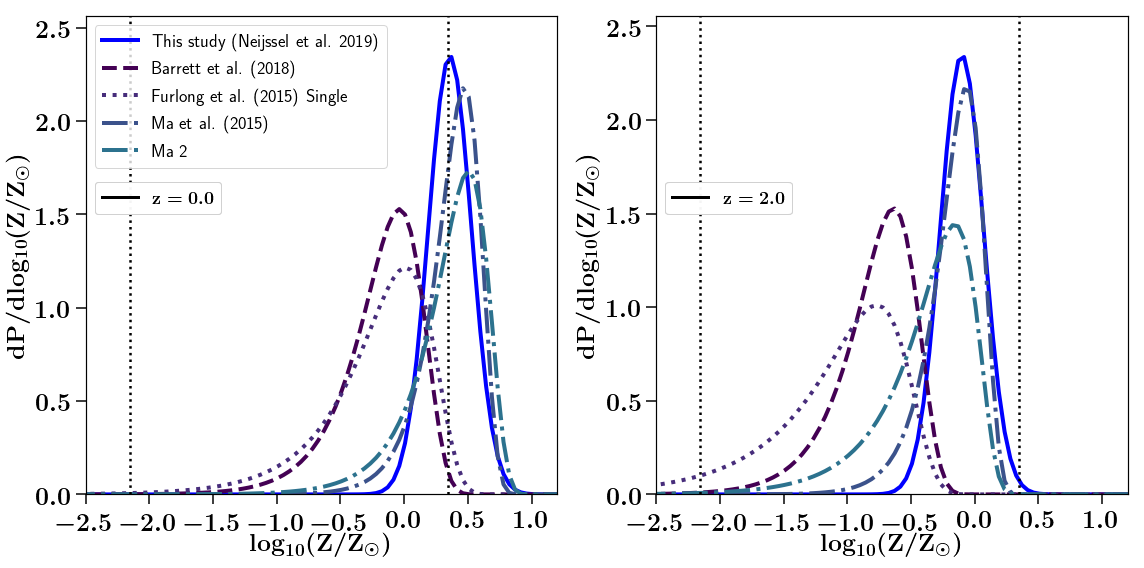

In [49]:



method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'                      , 'MZ_GSMF'                    , 'MZ_GSMF'  ]
SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Madau et al. (2014)'          , 'Madau et al. (2014)'        , 'Madau et al. (2014)']
logNormal  = ['Neijssel Phenomenological', None                         , None                          , None                         , None]
GSMFs      = [None                       , 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single']
MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. (2006)'        , 'Ma et al. (2015)'           , 'Ma et al. (2015)']

linestyles = ['-'                        , '--'                         , ':'                           , '-.'                         , '-.']
labels     = ['This study (Neijssel et al. 2019)'          , 'Barrett et al. (2018)'      , 'Furlong et al. (2015) Single', 'Ma et al. (2015)'           , 'Ma 2']


cm       = plt.get_cmap('viridis')
nColors  = 8+1  #want three colours for three variations (1 used in other plot later)
                    # dont want the brigthest colour hence I add a dummy value.
                    #Should be consistent with figure of metallicity PDFs
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

colours  =  [ 'b'                        ,mycolors[0]                   , mycolors[1]       \
             , mycolors[2], mycolors[3]]

redshifts         = [0]
alphas = [1.0, 0.6, 0.3]


fig, (axes, axes2) = plt.subplots(1,2, figsize=(16,8))
zBins = np.logspace(-4.5,0.,100)
center = (zBins[1:] + zBins[:-1])/2.
width  = np.diff(np.log10(zBins))

handles1 = []
for nrz, redshift in enumerate(redshifts):
    for nrL, L in enumerate(labels[0:]):
        PDF = np.zeros(len(center))
        mssfr.Zprescription         = method[nrL]
        mssfr.SFRprescription       = SFRs[nrL]
        mssfr.logNormalPrescription = logNormal[nrL]
        mssfr.GSMFprescription      = GSMFs[nrL]
        mssfr.ZMprescription        = MZs[nrL]
        #code is done such that we have to do it per metallicity
        for nrZ, Z in enumerate(center):
            Zlower   = zBins[nrZ]
            Zupper   = zBins[nrZ+1]
            if method[nrL] == 'logNormal':
                PDF[nrZ] = mssfr.returnFractionLogNormal(Zlower, Zupper, redshift)
            if method[nrL] == 'MZ_GSMF':
                PDF[nrZ] = mssfr.returnFractionMZ_GSMF(Zlower, Zupper, [redshift])
        PDF = np.divide(PDF, width)
        if nrz==0:
            label = labels[nrL] #+'  '+'  z='+str(redshift[0])
            ll    = True
        else:
            label = None
            ll    = False
        print mssfr.solarMetallicity, mssfr.logOH12sun
        if ll:
            l = axes.plot(np.log10(center/mssfr.solarMetallicity), PDF,  color=colours[nrL], \
                  label=label, lw=4, alpha=alphas[nrz], linestyle=linestyles[nrL])
            handles1.extend(l)
        else:
            axes.plot(np.log10(center/mssfr.solarMetallicity), PDF,  color=colours[nrL], \
                  label=label, lw=4, alpha=alphas[nrz], linestyle=linestyles[nrL])

first_legend = axes.legend(handles=handles1, loc=2,  prop={'size':18}, ncol=1)   
axes.add_artist(first_legend) 
            
nameX = r'$\rm \log_{10}(Z/Z_{\odot})$'
nameY = r'$\rm dP / dlog_{10}(Z/Z_{\odot}) $'
for Z in metallicityGrid[np.array([0,-1])]:
    axes.axvline(np.log10(Z/mssfr.solarMetallicity), c='k', linestyle=':', lw=2.5)

    
#again a fudge for second legend
handles2 = []
labelsZ = [r'$\rm z=0.0 $']#,r'$\rm z=1.5$', r'$\rm z=3.0$']
for nra, alpha in enumerate(redshifts):
    #draw a line outside plot area
    line, = axes.plot([1, 2],[-1, -2], c='k', alpha=alphas[nra], lw=3., label=labelsZ[nra])
    handles2.extend([line])

second_legend = axes.legend(handles=handles2, loc=6,  prop={'size':18}, ncol=1, bbox_to_anchor=(0., .62))   
axes.add_artist(second_legend)    

axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
axes.set_ylim(bottom=0)
axes.set_xlim(-2.5, 1.2)




## Second pane: z = 2.0 \
redshifts         = [2]
handles1 = []
for nrz, redshift in enumerate(redshifts):
    for nrL, L in enumerate(labels[0:]):
        PDF = np.zeros(len(center))
        mssfr.Zprescription         = method[nrL]
        mssfr.SFRprescription       = SFRs[nrL]
        mssfr.logNormalPrescription = logNormal[nrL]
        mssfr.GSMFprescription      = GSMFs[nrL]
        mssfr.ZMprescription        = MZs[nrL]
        #code is done such that we have to do it per metallicity
        for nrZ, Z in enumerate(center):
            Zlower   = zBins[nrZ]
            Zupper   = zBins[nrZ+1]
            if method[nrL] == 'logNormal':
                PDF[nrZ] = mssfr.returnFractionLogNormal(Zlower, Zupper, redshift)
            if method[nrL] == 'MZ_GSMF':
                PDF[nrZ] = mssfr.returnFractionMZ_GSMF(Zlower, Zupper, [redshift])
        PDF = np.divide(PDF, width)
        if nrz==0:
            label = labels[nrL] #+'  '+'  z='+str(redshift[0])
            ll    = True
        else:
            label = None
            ll    = False
        print mssfr.solarMetallicity, mssfr.logOH12sun
        if ll:
            l = axes2.plot(np.log10(center/mssfr.solarMetallicity), PDF,  color=colours[nrL], \
                  label=label, lw=4, alpha=alphas[nrz], linestyle=linestyles[nrL])
            handles1.extend(l)
        else:
            axes2.plot(np.log10(center/mssfr.solarMetallicity), PDF,  color=colours[nrL], \
                  label=label, lw=4, alpha=alphas[nrz], linestyle=linestyles[nrL])

# first_legend = axes2.legend(handles=handles1, loc=2,  prop={'size':18}, ncol=1)   
# axes2.add_artist(first_legend) 
            
nameX = r'$\rm \log_{10}(Z/Z_{\odot})$'
nameY = r'$\rm dP / dlog_{10}(Z/Z_{\odot}) $'
for Z in metallicityGrid[np.array([0,-1])]:
    axes2.axvline(np.log10(Z/mssfr.solarMetallicity), c='k', linestyle=':', lw=2.5)

    
#again a fudge for second legend
handles2 = []
labelsZ = [r'$\rm z=2.0 $']#,r'$\rm z=1.5$', r'$\rm z=3.0$']
for nra, alpha in enumerate(redshifts):
    #draw a line outside plot area
    line, = axes2.plot([1, 2],[-1, -2], c='k', alpha=alphas[nra], lw=3., label=labelsZ[nra])
    handles2.extend([line])

second_legend = axes2.legend(handles=handles2, loc=6,  prop={'size':18}, ncol=1, bbox_to_anchor=(0., .62))   
axes2.add_artist(second_legend)    

axes2 = CV.layoutAxes(axes2, nameX=nameX, nameY=nameY)
axes2.set_ylim(bottom=0)
axes2.set_xlim(-2.5, 1.2)







plt.tight_layout()
plt.savefig('./ZvsPDF_z0.png')
plt.show()
plt.close()

In [ ]:
handles1 = []
for nrz, redshift in enumerate(redshifts):
    for nrL, L in enumerate(labels[0:]):
        PDF = np.zeros(len(center))
        mssfr.Zprescription         = method[nrL]
        mssfr.SFRprescription       = SFRs[nrL]
        mssfr.logNormalPrescription = logNormal[nrL]
        mssfr.GSMFprescription      = GSMFs[nrL]
        mssfr.ZMprescription        = MZs[nrL]
        #code is done such that we have to do it per metallicity
        for nrZ, Z in enumerate(center):
            Zlower   = zBins[nrZ]
            Zupper   = zBins[nrZ+1]
            if method[nrL] == 'logNormal':
                PDF[nrZ] = mssfr.returnFractionLogNormal(Zlower, Zupper, redshift)
            if method[nrL] == 'MZ_GSMF':
                PDF[nrZ] = mssfr.returnFractionMZ_GSMF(Zlower, Zupper, [redshift])
        PDF = np.divide(PDF, width)
        if nrz==0:
            label = labels[nrL] #+'  '+'  z='+str(redshift[0])
            ll    = True
        else:
            label = None
            ll    = False
        print mssfr.solarMetallicity, mssfr.logOH12sun
        if ll:
            l = axes2.plot(np.log10(center/mssfr.solarMetallicity), PDF,  color=colours[nrL], \
                  label=label, lw=4, alpha=alphas[nrz], linestyle=linestyles[nrL])
            handles1.extend(l)
        else:
            axes2.plot(np.log10(center/mssfr.solarMetallicity), PDF,  color=colours[nrL], \
                  label=label, lw=4, alpha=alphas[nrz], linestyle=linestyles[nrL])

first_legend = axes2.legend(handles=handles1, loc=2,  prop={'size':18}, ncol=1)   
axes2.add_artist(first_legend) 
            
nameX = r'$\rm \log_{10}(Z/Z_{\odot})$'
nameY = r'$\rm dP / dlog_{10}(Z/Z_{\odot}) $'
for Z in metallicityGrid[np.array([0,-1])]:
    axes2.axvline(np.log10(Z/mssfr.solarMetallicity), c='k', linestyle=':', lw=2.5)

    
#again a fudge for second legend
handles2 = []
labelsZ = [r'$\rm z=0.0 $']#,r'$\rm z=1.5$', r'$\rm z=3.0$']
for nra, alpha in enumerate(redshifts):
    #draw a line outside plot area
    line, = axes2.plot([1, 2],[-1, -2], c='k', alpha=alphas[nra], lw=3., label=labelsZ[nra])
    handles2.extend([line])

second_legend = axes2.legend(handles=handles2, loc=3,  prop={'size':18}, ncol=1, bbox_to_anchor=(0., .62))   
axes2.add_artist(second_legend)    

axes2 = CV.layoutaxes2(axes2, nameX=nameX, nameY=nameY)
axes2.set_ylim(bottom=0)
axes2.set_xlim(-2.5, 1.2)



0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69


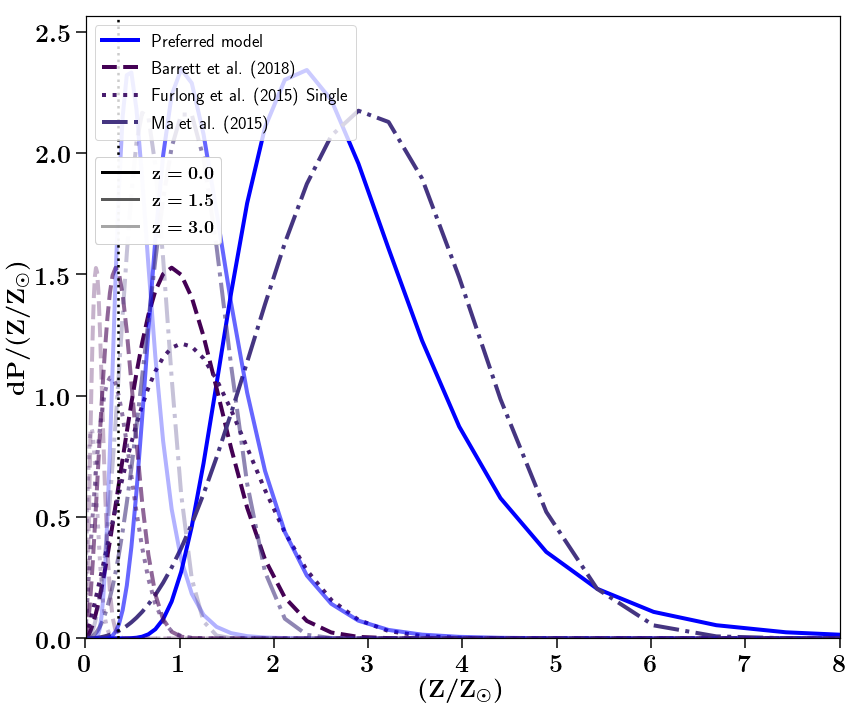

In [30]:



method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'                      , 'MZ_GSMF']
SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Madau et al. (2014)'          , 'Madau et al. (2014)']
logNormal  = ['Neijssel Phenomenological', None                         , None                          , None]
GSMFs      = [None                       , 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Panter et al. (2004) Single']
MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. (2006)'        , 'Ma et al. (2015)']

linestyles = ['-'                        , '--'                         , ':'                           , '-.']
labels     = ['Preferred model'          , 'Barrett et al. (2018)'      , 'Furlong et al. (2015) Single', 'Ma et al. (2015)']


cm       = plt.get_cmap('viridis')
nColors  = 13+1  #want three colours for three variations (1 used in other plot later)
                    # dont want the brigthest colour hence I add a dummy value.
                    #Should be consistent with figure of metallicity PDFs
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

colours  =  [ 'b'                        ,mycolors[0]                   , mycolors[1]                   , mycolors[2]]

redshifts         = [0, 1.5, 3]
alphas = [1.0, 0.6, 0.3]


fig, axes = plt.subplots(1,1, figsize=(12,10))
zBins = np.logspace(-4.5,0.,100)
center = (zBins[1:] + zBins[:-1])/2.
width  = np.diff(np.log10(zBins))

handles1 = []
for nrz, redshift in enumerate(redshifts):
    for nrL, L in enumerate(labels[0:]):
        PDF = np.zeros(len(center))
        mssfr.Zprescription         = method[nrL]
        mssfr.SFRprescription       = SFRs[nrL]
        mssfr.logNormalPrescription = logNormal[nrL]
        mssfr.GSMFprescription      = GSMFs[nrL]
        mssfr.ZMprescription        = MZs[nrL]
        #code is done such that we have to do it per metallicity
        for nrZ, Z in enumerate(center):
            Zlower   = zBins[nrZ]
            Zupper   = zBins[nrZ+1]
            if method[nrL] == 'logNormal':
                PDF[nrZ] = mssfr.returnFractionLogNormal(Zlower, Zupper, redshift)
            if method[nrL] == 'MZ_GSMF':
                PDF[nrZ] = mssfr.returnFractionMZ_GSMF(Zlower, Zupper, [redshift])
        PDF = np.divide(PDF, width)
        if nrz==0:
            label = labels[nrL] #+'  '+'  z='+str(redshift[0])
            ll    = True
        else:
            label = None
            ll    = False
        print mssfr.solarMetallicity, mssfr.logOH12sun
        if ll:
            l = axes.plot(10**np.log10(center/mssfr.solarMetallicity), PDF,  color=colours[nrL], \
                  label=label, lw=4, alpha=alphas[nrz], linestyle=linestyles[nrL])
            handles1.extend(l)
        else:
            axes.plot(10**np.log10(center/mssfr.solarMetallicity), PDF,  color=colours[nrL], \
                  label=label, lw=4, alpha=alphas[nrz], linestyle=linestyles[nrL])

first_legend = axes.legend(handles=handles1, loc=2,  prop={'size':18}, ncol=1)   
axes.add_artist(first_legend) 
            
nameX = r'$\rm (Z/Z_{\odot})$'
nameY = r'$\rm dP / (Z/Z_{\odot}) $'
for Z in metallicityGrid[np.array([0,-1])]:
    axes.axvline(np.log10(Z/mssfr.solarMetallicity), c='k', linestyle=':', lw=2.5)

    
#again a fudge for second legend
handles2 = []
labelsZ = [r'$\rm z=0.0 $',r'$\rm z=1.5$', r'$\rm z=3.0$']
for nra, alpha in enumerate(redshifts):
    #draw a line outside plot area
    line, = axes.plot([1, 2],[-1, -2], c='k', alpha=alphas[nra], lw=3., label=labelsZ[nra])
    handles2.extend([line])

second_legend = axes.legend(handles=handles2, loc=3,  prop={'size':18}, ncol=1, bbox_to_anchor=(0., .62))   
axes.add_artist(second_legend)    

axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
axes.set_ylim(bottom=0)
axes.set_xlim(10**(-2.5), 8)
plt.tight_layout()
plt.savefig('./ZvsPDF-notLOG.png')
plt.show()
plt.close()

0.0142 8.69
0.0142 8.69
0.0142 8.69
0.0142 8.69
('is this solar?', 0.0142)
1.0


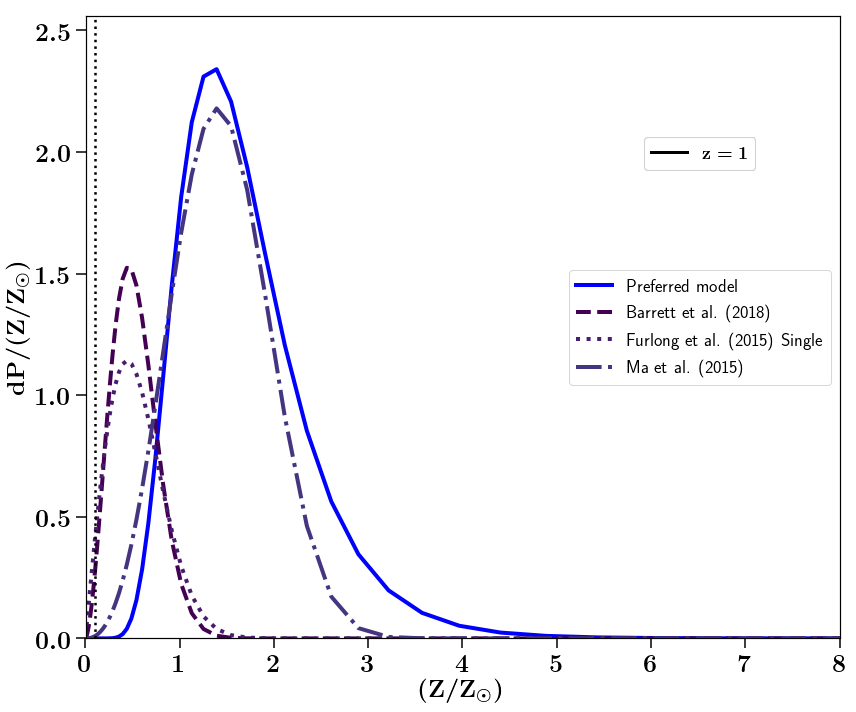

In [19]:



method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'                      , 'MZ_GSMF']
SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Madau et al. (2014)'          , 'Madau et al. (2014)']
logNormal  = ['Neijssel Phenomenological', None                         , None                          , None]
GSMFs      = [None                       , 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Panter et al. (2004) Single']
MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. (2006)'        , 'Ma et al. (2015)']

linestyles = ['-'                        , '--'                         , ':'                           , '-.']
labels     = ['Preferred model'          , 'Barrett et al. (2018)'      , 'Furlong et al. (2015) Single', 'Ma et al. (2015)']


cm       = plt.get_cmap('viridis')
nColors  = 13+1  #want three colours for three variations (1 used in other plot later)
                    # dont want the brigthest colour hence I add a dummy value.
                    #Should be consistent with figure of metallicity PDFs
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

colours  =  [ 'b'                        ,mycolors[0]                   , mycolors[1]                   , mycolors[2]]

redshifts         = [1]
alphas = [1.0, 0.6, 0.3]


fig, axes = plt.subplots(1,1, figsize=(12,10))
zBins = np.logspace(-4.5,0.,100)
center = (zBins[1:] + zBins[:-1])/2.
width  = np.diff(np.log10(zBins))

handles1 = []
for nrz, redshift in enumerate(redshifts):
    for nrL, L in enumerate(labels[0:]):
        PDF = np.zeros(len(center))
        mssfr.Zprescription         = method[nrL]
        mssfr.SFRprescription       = SFRs[nrL]
        mssfr.logNormalPrescription = logNormal[nrL]
        mssfr.GSMFprescription      = GSMFs[nrL]
        mssfr.ZMprescription        = MZs[nrL]
        #code is done such that we have to do it per metallicity
        for nrZ, Z in enumerate(center):
            Zlower   = zBins[nrZ]
            Zupper   = zBins[nrZ+1]
            if method[nrL] == 'logNormal':
                PDF[nrZ] = mssfr.returnFractionLogNormal(Zlower, Zupper, redshift)
            if method[nrL] == 'MZ_GSMF':
                PDF[nrZ] = mssfr.returnFractionMZ_GSMF(Zlower, Zupper, [redshift])
        PDF = np.divide(PDF, width)
        if nrz==0:
            label = labels[nrL] #+'  '+'  z='+str(redshift[0])
            ll    = True
        else:
            label = None
            ll    = False
        print mssfr.solarMetallicity, mssfr.logOH12sun
        if ll:
            l = axes.plot(10**np.log10(center/mssfr.solarMetallicity), PDF,  color=colours[nrL], \
                  label=label, lw=4, alpha=alphas[nrz], linestyle=linestyles[nrL])
            handles1.extend(l)
        else:
            axes.plot(10**np.log10(center/mssfr.solarMetallicity), PDF,  color=colours[nrL], \
                  label=label, lw=4, alpha=alphas[nrz], linestyle=linestyles[nrL])

first_legend = axes.legend(handles=handles1, loc=5,  prop={'size':18}, ncol=1)   
axes.add_artist(first_legend) 
            
nameX = r'$\rm (Z/Z_{\odot})$'
nameY = r'$\rm dP / (Z/Z_{\odot}) $'
for Z in [0.1*0.142]:
    print('is this solar?', mssfr.solarMetallicity)
    print(Z/mssfr.solarMetallicity)
    axes.axvline(0.1, c='k', linestyle=':', lw=2.5)

    
#again a fudge for second legend
handles2 = []
labelsZ = [r'$\rm z=1 $',r'$\rm z=1.5$', r'$\rm z=3.0$']
for nra, alpha in enumerate(redshifts):
    #draw a line outside plot area
    line, = axes.plot([1, 2],[-1, -2], c='k', alpha=alphas[nra], lw=3., label=labelsZ[nra])
    handles2.extend([line])

second_legend = axes.legend(handles=handles2, loc=1,  prop={'size':18}, ncol=1, bbox_to_anchor=(0.9, .82))   
axes.add_artist(second_legend)    

axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
axes.set_ylim(bottom=0)
axes.set_xlim(10**(-2.5), 8)
plt.tight_layout()
plt.savefig('./ZvsPDF-notLOG_z1.png')
plt.show()
plt.close()

In [ ]:
import scipy.special
a1 = -2.9
x  =  3
print scipy.special.gammainc(a1+3.0, x)*scipy.special.gamma(a1+3.)

print (a1+2)*scipy.special.gammainc(a1+2, x)*scipy.special.gamma(a1+2) - (x**(a1+2))* np.exp(-x)

In [ ]:
print np.exp(1)

In [ ]:
a =  (scipy.special.gammainc(a1+3.0, x)*scipy.special.gamma(a1+3.) + (x**(a1+2))* np.exp(-x)) / (a1+2)
print a
print scipy.special.gammainc(a1+2, x)*scipy.special.gamma(a1+2)
print scipy.special.gamma(a1+2)

In [ ]:
print a  / scipy.special.gamma(a1+2)


In [ ]:
a2 = -1.99
print scipy.special.gammainc(a2+2.0, 4)


In [ ]:
logM  =
logMc =
def integral(logM, logMc, alpha):
    x = logM/logMc
    